In [ ]:
#modelv1ensemble MLP
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Concatenate,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model , Model,Sequential
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)
image_size=(380,380)
batch_size=16
val_ds =  image_dataset_from_directory(
    directory="H:\\article\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=image_size,
    batch_size=batch_size,
)

In [4]:
#v1
input_modelv1b0 = load_model("H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b0best.h5")
input_modelv1b1 = load_model("H:article\\modelstrainedv1test1-701515\\efficientnetv1b1best.h5")
input_modelv1b2 = load_model("H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b2best.h5")
input_modelv1b3 = load_model("H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b3best.h5")
input_modelv1b4 = load_model("H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b4best.h5")
modelv1b0 = Model([input_modelv1b0.get_layer("rescaling").input], [input_modelv1b0.get_layer("top_activation").output])
modelv1b1 = Model([input_modelv1b1.get_layer("rescaling").input], [input_modelv1b1.get_layer("top_activation").output])
modelv1b2 = Model([input_modelv1b2.get_layer("rescaling_1").input], [input_modelv1b2.get_layer("top_activation").output])
modelv1b3 = Model([input_modelv1b3.get_layer("rescaling_2").input], [input_modelv1b3.get_layer("top_activation").output])
modelv1b4 = Model([input_modelv1b4.get_layer("rescaling_3").input], [input_modelv1b4.get_layer("top_activation").output])
del input_modelv1b0 , input_modelv1b1 , input_modelv1b2 , input_modelv1b3 , input_modelv1b4


In [5]:
IMG_SIZE=380
NUM_CLASSES=2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Reshape, Lambda, Resizing,GlobalAveragePooling2D
from tensorflow.keras.models import Model,save_model
def build_model(num_classes):
    #v1
    inputs = Input(shape=(380, 380, 3))
    x=img_augmentation(inputs)
    v1b0=tf.image.resize (x,(224,224))
    v1b1=tf.image.resize (x,(240,240))
    v1b2=tf.image.resize (x,(260,260))
    v1b3=tf.image.resize (x,(300,300))
    v1b4=x
    #v1
    modelv1b0.trainable = False
    modelv1b1.trainable = False
    modelv1b2.trainable = False
    modelv1b3.trainable = False
    modelv1b4.trainable = False
    #v1
    b0v1=modelv1b0(v1b0)
    b1v1=modelv1b1(v1b1)
    b2v1=modelv1b2(v1b2)
    b3v1=modelv1b3(v1b3)
    b4v1=modelv1b4(v1b4)
    #
    b0v1=GlobalAveragePooling2D()(b0v1)
    b1v1=GlobalAveragePooling2D()(b1v1)
    b2v1=GlobalAveragePooling2D()(b2v1)
    b3v1=GlobalAveragePooling2D()(b3v1)
    b4v1=GlobalAveragePooling2D()(b4v1)


    bbb=Concatenate()([b0v1,b1v1,b2v1,b3v1,b4v1])
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout111")(bbb)
    bbb = Dense(128, activation='relu')(bbb)
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout112")(bbb)
    bbb = Dense(32, activation='relu')(bbb)
    bbb = BatchNormalization()(bbb)
    top_dropout_rate = 0.2
    bbb = layers.Dropout(top_dropout_rate, name="top_dropout333")(bbb)
    
    output = Dense(2, activation='softmax')(bbb)


    model = Model(inputs=inputs, outputs=output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_5[0][0]']                
                                                                                                  
 tf.image.resize (TFOpLambda)   (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 tf.image.resize_1 (TFOpLambda)  (None, 240, 240, 3)  0          ['img_augmentation[0][0]'] 

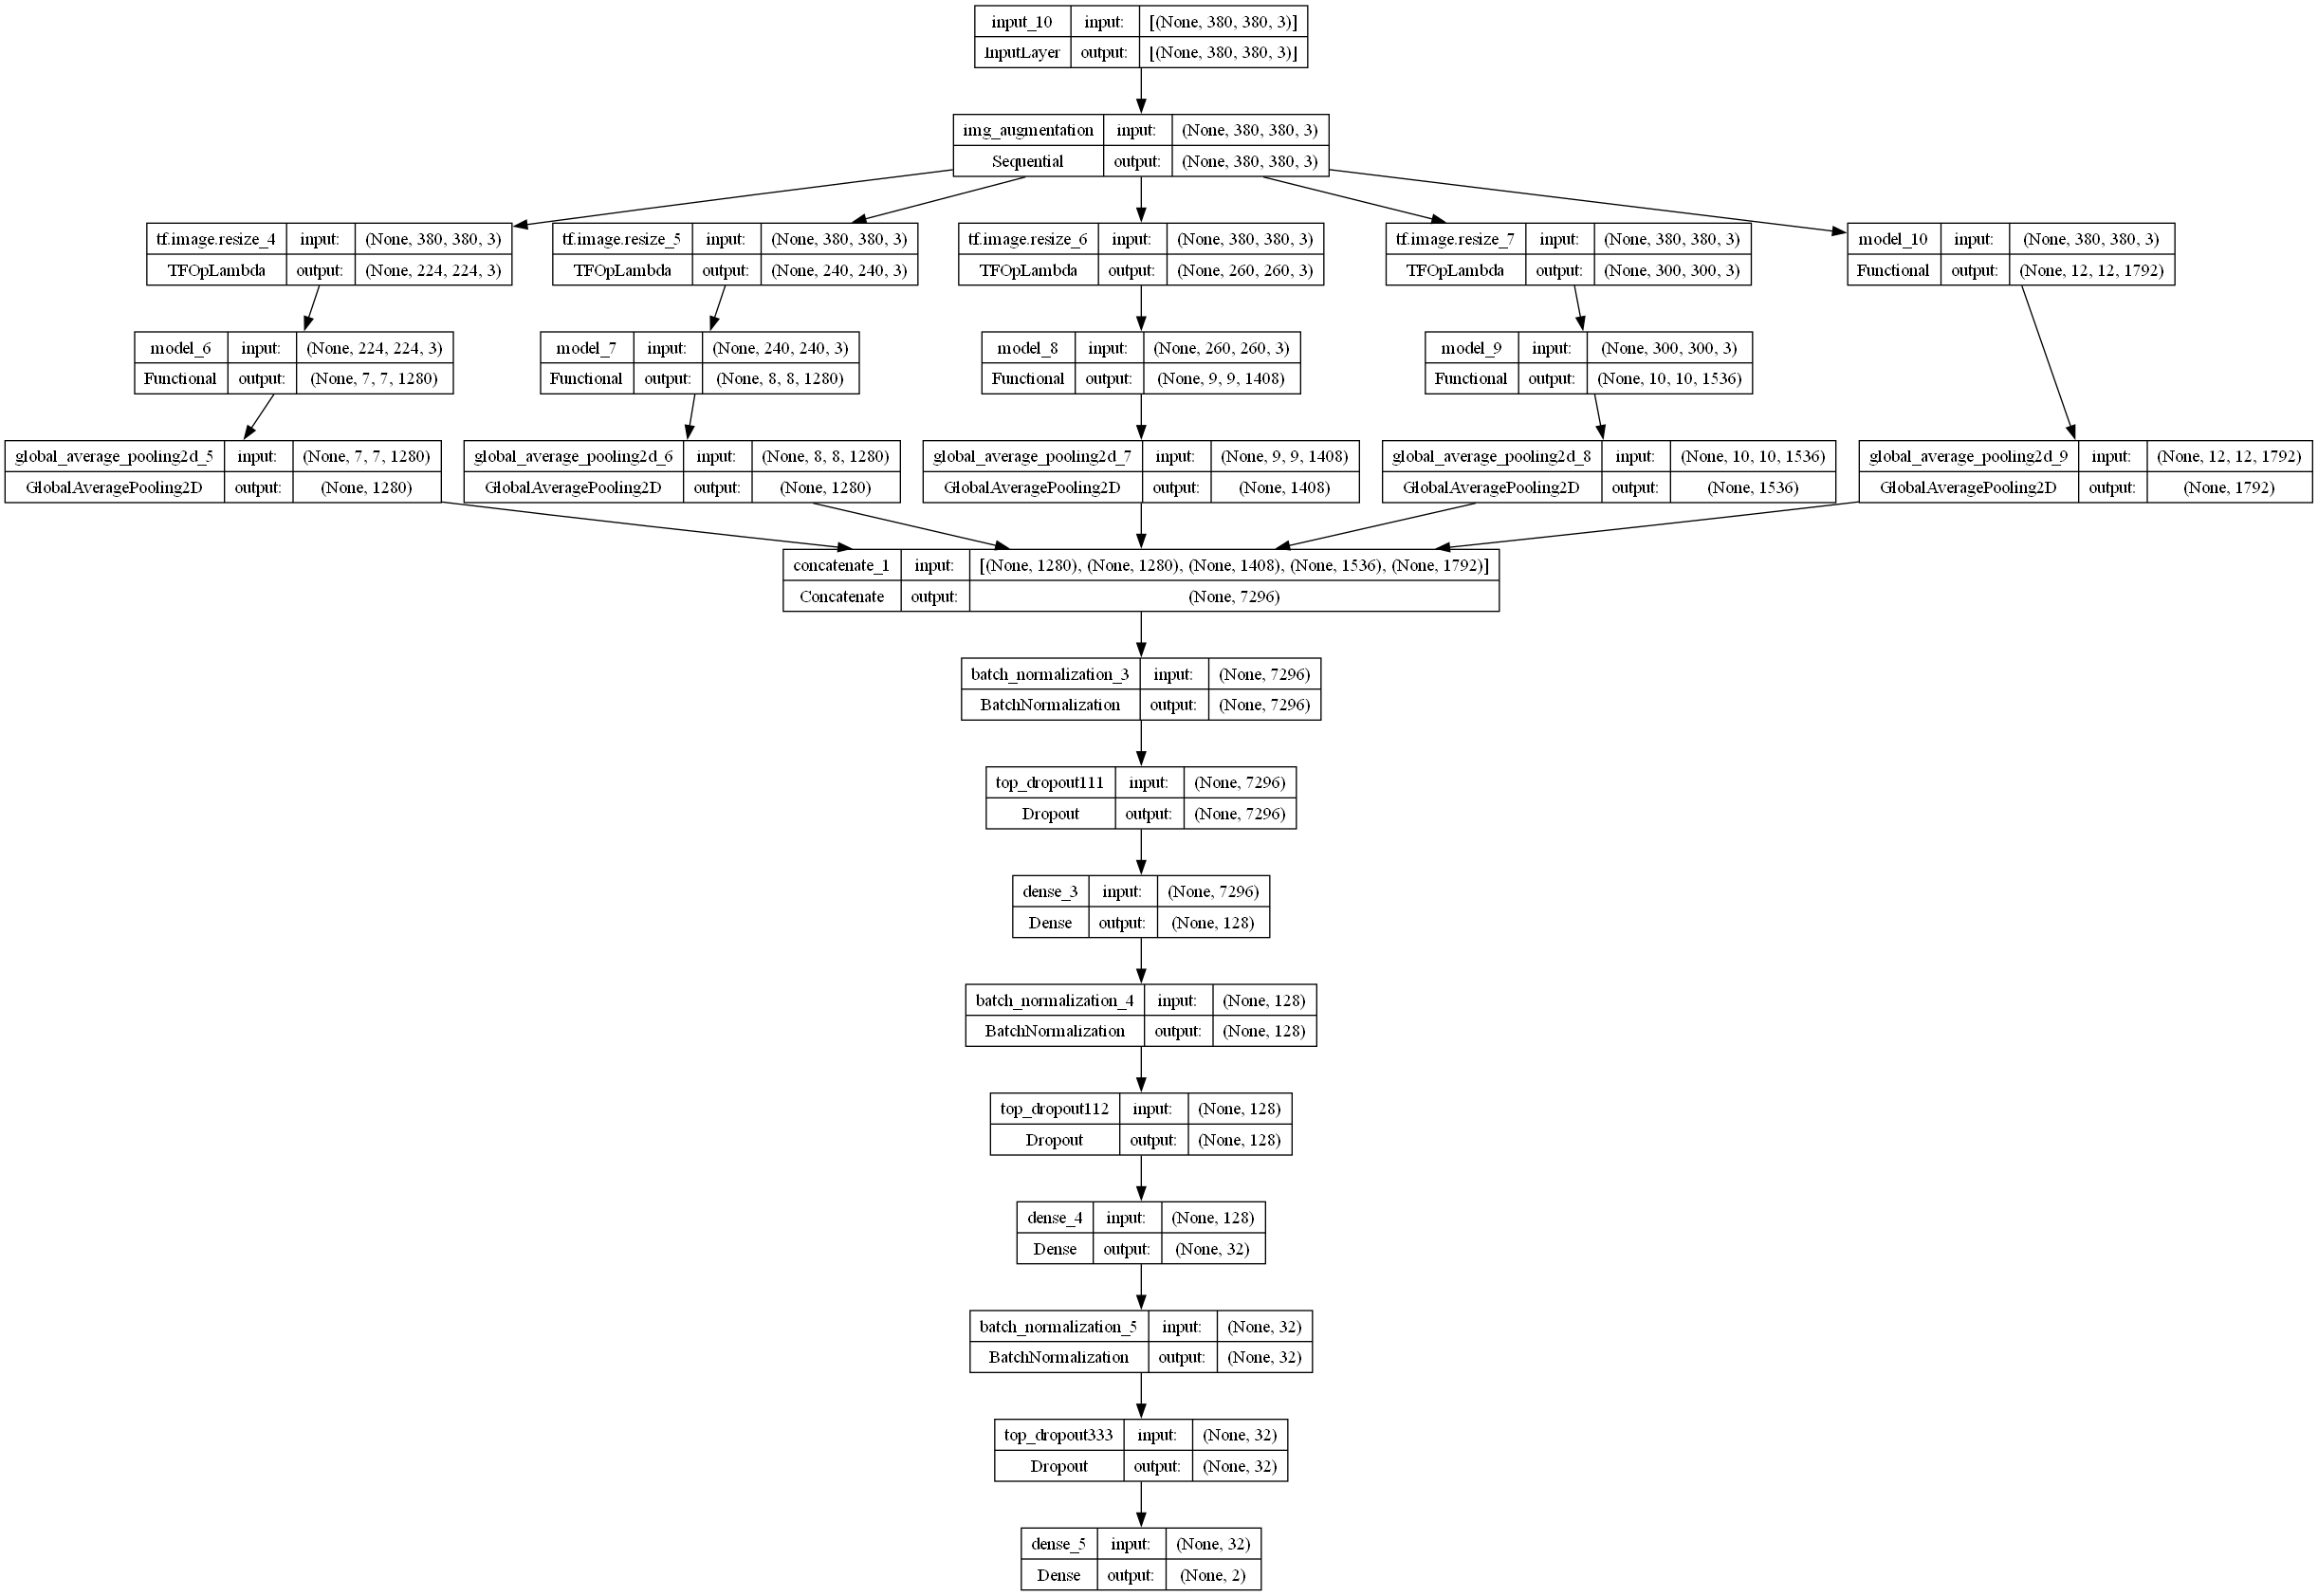

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plotv1ensemble.png', show_shapes=True, show_layer_names=True)


In [12]:
for layer in model.layers:
    print(layer._name)
    print(layer.trainable)

input_10
True
img_augmentation
True
tf.image.resize_4
True
tf.image.resize_5
True
tf.image.resize_6
True
tf.image.resize_7
True
model_6
False
model_7
False
model_8
False
model_9
False
model_10
False
global_average_pooling2d_5
True
global_average_pooling2d_6
True
global_average_pooling2d_7
True
global_average_pooling2d_8
True
global_average_pooling2d_9
True
concatenate_1
True
batch_normalization_3
True
top_dropout111
True
dense_3
True
batch_normalization_4
True
top_dropout112
True
dense_4
True
batch_normalization_5
True
top_dropout333
True
dense_5
True


In [13]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,patience=1)
hist=model.fit(val_ds,epochs=40,validation_data=test_ds,callbacks=[reduce_lr])

Epoch 1/40
74/74 [==============================] - 89s 676ms/step - loss: 0.1583 - accuracy: 0.9475 - val_loss: 0.0329 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 2/40
74/74 [==============================] - 39s 531ms/step - loss: 0.1029 - accuracy: 0.9755 - val_loss: 0.0321 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 3/40
74/74 [==============================] - 39s 528ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0240 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 4/40
74/74 [==============================] - 39s 527ms/step - loss: 0.0459 - accuracy: 0.9873 - val_loss: 0.0213 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 5/40
74/74 [==============================] - 39s 528ms/step - loss: 0.0765 - accuracy: 0.9788 - val_loss: 0.0192 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 6/40
74/74 [==============================] - 39s 529ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.0177 - val_accuracy: 0.9949 - lr: 5.0000e-04
Epoch 7/40
74/74 [==============================] - 39s 529m

In [14]:
model.evaluate(test_ds)

74/74 [==============================] - 15s 201ms/step - loss: 0.0194 - accuracy: 0.9949


[0.01943012699484825, 0.9949238300323486]

In [ ]:
model.save("v1test1ensemblemodel.h5")

In [ ]:
model.summary()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Concatenate,Input,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import load_model , Model,Sequential
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = load_model('H:\\article\\modelsensembletest1\\v1test1ensemblemodel.h5')
image_size=(380,380)
batch_size=16

test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0)  
y_pred = model.predict(test_ds) 
y_pred = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']  

current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]
plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


misclassified_indices = np.where(y_true != y_pred)[0]  
file_paths = test_ds.file_paths
misclassified_files = [file_paths[i] for i in misclassified_indices]

###
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("Misclassified filenames:")
for file in misclassified_files:
    print(file)

{'loss': [0.15830358862876892, 0.10288003832101822, 0.07046561688184738, 0.04586296156048775, 0.07653762400150299, 0.04203937575221062, 0.061005834490060806, 0.03498159348964691, 0.038043662905693054, 0.040049709379673004, 0.02375548705458641, 0.035976018756628036, 0.04640953242778778, 0.024572301656007767, 0.05340488255023956, 0.03380626067519188, 0.04590143263339996, 0.0271329116076231, 0.023297853767871857, 0.023193545639514923, 0.022335601970553398, 0.04044125974178314, 0.022738683968782425, 0.030067618936300278, 0.03615112602710724, 0.0345318578183651, 0.03329447656869888, 0.028833653777837753, 0.024085359647870064, 0.026691049337387085, 0.039505861699581146, 0.02957867458462715, 0.030184205621480942, 0.03823624923825264, 0.028432974591851234, 0.036136701703071594, 0.03631119802594185, 0.02829323522746563, 0.04221510887145996, 0.0399053655564785], 'accuracy': [0.9475465416908264, 0.9754652976989746, 0.9780033826828003, 0.9873096346855164, 0.9788494110107422, 0.9856175780296326, 0.

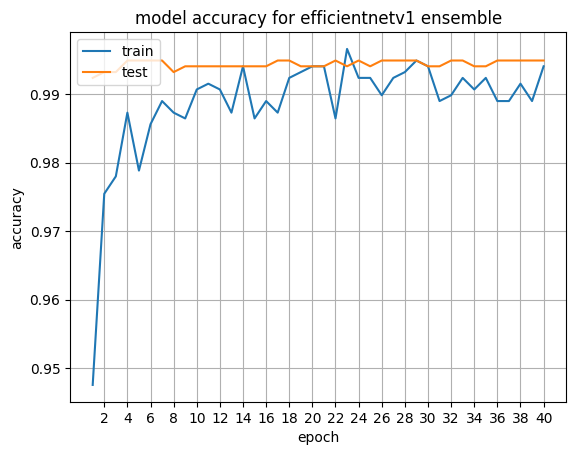

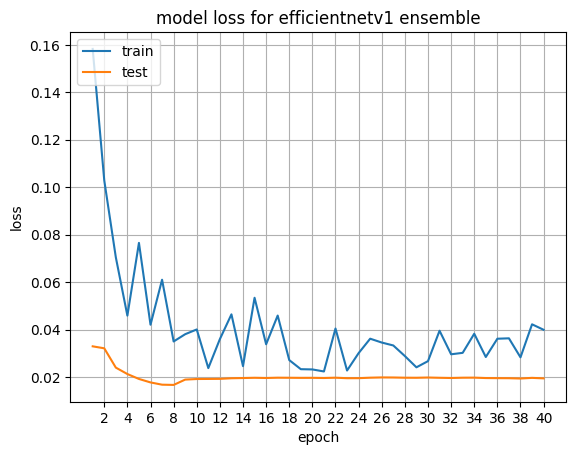

In [19]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy for efficientnetv1 ensemble")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.grid(True)
    plt.xticks(np.arange(len(hist.history["accuracy"])), np.arange(1, len(hist.history["val_accuracy"])+1))
    epochs = range(1, len(hist.history["accuracy"]) + 1)
    plt.xticks(epochs[::2])  
    plt.show()
plot_hist(hist)

def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss for efficientnetv1 ensemble")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.grid(True)
    plt.xticks(np.arange(len(hist.history["accuracy"])), np.arange(1, len(hist.history["val_accuracy"])+1))
    epochs = range(1, len(hist.history["accuracy"]) + 1)
    plt.xticks(epochs[::2])
    plt.show()
    
plot_hist(hist)


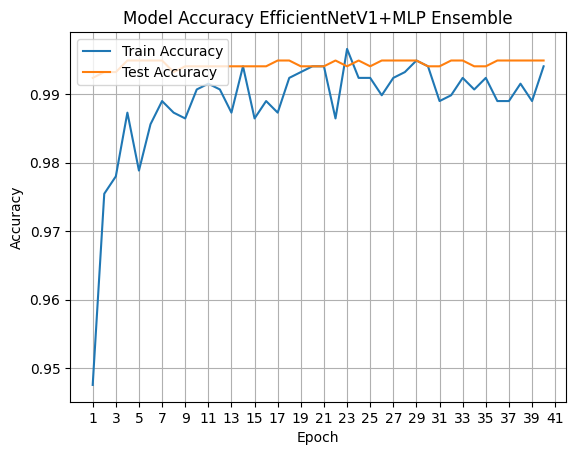

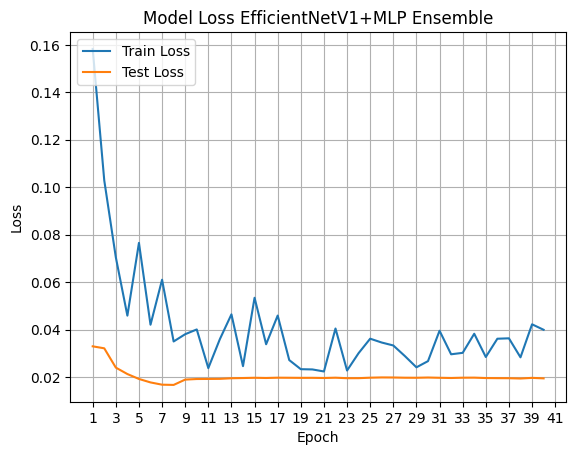

In [3]:
hist={'loss': [0.15830358862876892, 0.10288003832101822, 0.07046561688184738, 0.04586296156048775, 0.07653762400150299, 0.04203937575221062, 0.061005834490060806, 0.03498159348964691, 0.038043662905693054, 0.040049709379673004, 0.02375548705458641, 0.035976018756628036, 0.04640953242778778, 0.024572301656007767, 0.05340488255023956, 0.03380626067519188, 0.04590143263339996, 0.0271329116076231, 0.023297853767871857, 0.023193545639514923, 0.022335601970553398, 0.04044125974178314, 0.022738683968782425, 0.030067618936300278, 0.03615112602710724, 0.0345318578183651, 0.03329447656869888, 0.028833653777837753, 0.024085359647870064, 0.026691049337387085, 0.039505861699581146, 0.02957867458462715, 0.030184205621480942, 0.03823624923825264, 0.028432974591851234, 0.036136701703071594, 0.03631119802594185, 0.02829323522746563, 0.04221510887145996, 0.0399053655564785], 'accuracy': [0.9475465416908264, 0.9754652976989746, 0.9780033826828003, 0.9873096346855164, 0.9788494110107422, 0.9856175780296326, 0.9890016913414001, 0.9873096346855164, 0.9864636063575745, 0.9906937479972839, 0.9915397763252258, 0.9906937479972839, 0.9873096346855164, 0.9940778613090515, 0.9864636063575745, 0.9890016913414001, 0.9873096346855164, 0.9923858046531677, 0.9932318329811096, 0.9940778613090515, 0.9940778613090515, 0.9864636063575745, 0.9966158866882324, 0.9923858046531677, 0.9923858046531677, 0.989847719669342, 0.9923858046531677, 0.9932318329811096, 0.9949238300323486, 0.9940778613090515, 0.9890016913414001, 0.989847719669342, 0.9923858046531677, 0.9906937479972839, 0.9923858046531677, 0.9890016913414001, 0.9890016913414001, 0.9915397763252258, 0.9890016913414001, 0.9940778613090515], 'val_loss': [0.03293049335479736, 0.032099105417728424, 0.023965254426002502, 0.02125006541609764, 0.019181562587618828, 0.017718395218253136, 0.01676345244050026, 0.016664015129208565, 0.01890779472887516, 0.019154386594891548, 0.01918536238372326, 0.01922309771180153, 0.01947687938809395, 0.019566232338547707, 0.01967143453657627, 0.01958450861275196, 0.01970711722970009, 0.019676316529512405, 0.019637174904346466, 0.019648505374789238, 0.01958354376256466, 0.01970350183546543, 0.0194989200681448, 0.019511954858899117, 0.019710110500454903, 0.01982221193611622, 0.019792906939983368, 0.019699787721037865, 0.019677551463246346, 0.019780131056904793, 0.019668029621243477, 0.019582634791731834, 0.01970287784934044, 0.019729511812329292, 0.019563376903533936, 0.01951940357685089, 0.019497815519571304, 0.019366443157196045, 0.01963391900062561, 0.0194301288574934], 'val_accuracy': [0.9923858046531677, 0.9932318329811096, 0.9932318329811096, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9932318329811096, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9940778613090515, 0.9949238300323486, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9940778613090515, 0.9940778613090515, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486, 0.9949238300323486], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.00025, 0.00025, 0.000125, 6.25e-05, 6.25e-05, 3.125e-05, 1.5625e-05, 7.8125e-06, 3.90625e-06, 1.953125e-06, 9.765625e-07, 4.882813e-07, 4.882813e-07, 4.882813e-07, 4.882813e-07, 2.4414064e-07, 1.2207032e-07, 6.103516e-08, 3.051758e-08, 1.525879e-08, 7.629395e-09, 3.8146974e-09, 1.9073487e-09, 9.536744e-10, 4.768372e-10, 2.384186e-10, 1.192093e-10, 5.960465e-11, 2.9802324e-11, 1.4901162e-11, 7.450581e-12, 3.7252905e-12, 1.8626452e-12]}
import matplotlib.pyplot as plt
def plot_accuracy(hist):
    epochs = range(1, len(hist['accuracy']) + 1)  
    plt.plot(epochs, hist['accuracy'], label='Train Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy EfficientNetV1+MLP Ensemble')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2)) 
    plt.show()


def plot_loss(hist):
    epochs = range(1, len(hist['loss']) + 1)
    plt.plot(epochs, hist['loss'], label='Train Loss')
    plt.plot(epochs, hist['val_loss'], label='Test Loss')
    plt.title('Model Loss EfficientNetV1+MLP Ensemble')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(range(1, 42, 2))  
    plt.show()
plot_accuracy(hist)
plot_loss(hist)

In [10]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
def grad_cam(input_model, image, layer_name):
    img_arr = tf.keras.preprocessing.image.img_to_array(image)
    x = img_arr[tf.newaxis]
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x)

    grad_model = tf.keras.models.Model([input_model.inputs], [input_model.get_layer(layer_name).get_output_at(0), input_model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]


    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')

    guided_grads = gate_f * gate_r * grads

    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (x.shape[1], x.shape[2]), cv2.INTER_LINEAR)

    cam  = np.maximum(cam, 0)

    heatmap = cam / cam.max()


    jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)

    rgb_cam = np.float32(cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB))
    output_arr = cv2.addWeighted(src1=img_arr, alpha=0.7, src2=rgb_cam, beta=0.3, gamma=0)
    output_image = tf.keras.preprocessing.image.array_to_img(output_arr)

    return output_image

In [6]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 380, 380, 3)  0           ['input_10[0][0]']               
                                                                                                  
 tf.image.resize_4 (TFOpLambda)  (None, 224, 224, 3)  0          ['img_augmentation[0][0]']       
                                                                                                  
 tf.image.resize_5 (TFOpLambda)  (None, 240, 240, 3)  0          ['img_augmentation[0][0]']

In [ ]:
'H:\\article\\1\\test\\benign\\SOB_B_A-14-22549CD-100-029.png'
'H:\\article\\1\\test\\benign\\SOB_B_A-14-22549G-200-004.png'
'H:\\article\\1\\test\\benign\\SOB_B_A-14-22549G-200-005.png'
'H:\\article\\1\\test\\benign\\SOB_B_PT-14-21998AB-40-057.png'
'H:\\article\\1\\test\\malignant\\SOB_M_LC-14-15570-400-018.png'
'H:\\article\\1\\test\\malignant\\SOB_M_MC-14-10147-200-004.png'


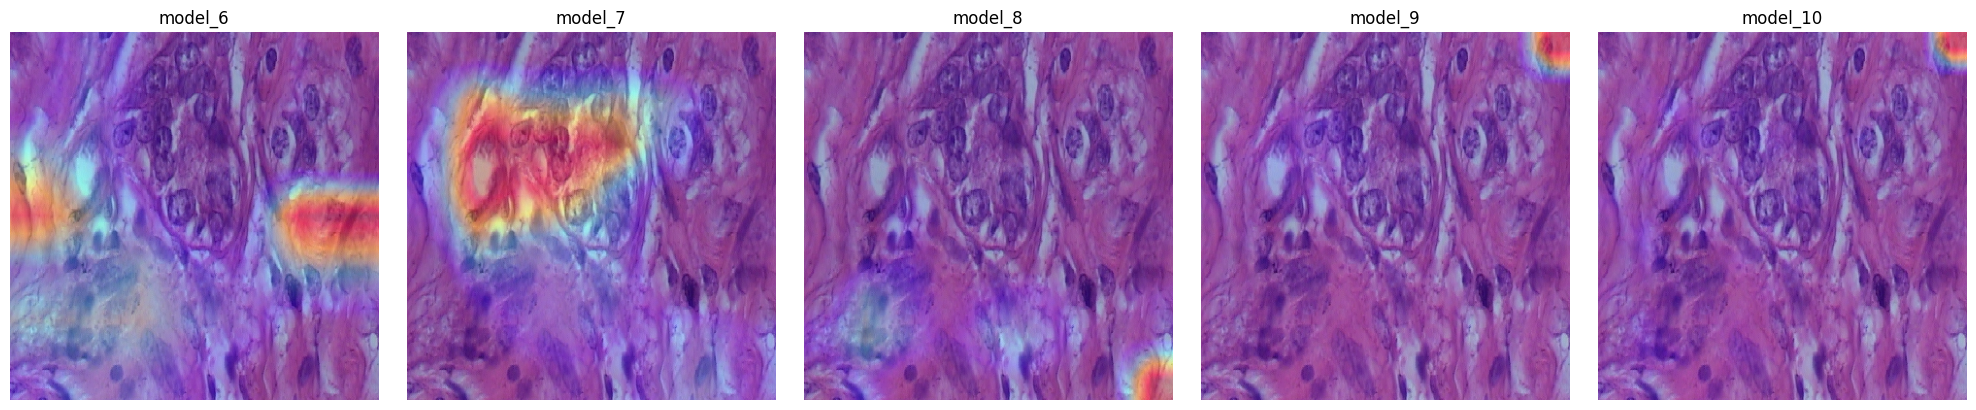

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf


img_path = 'H:\\article\\1\\test\\benign\SOB_B_F-14-29960AB-400-001.png'  # Path to the image
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(380, 380))


outputs = []


for model_name in ['model_6', 'model_7', 'model_8', 'model_9', 'model_10']:
    output_image = grad_cam(model, img_pil, model_name)
    outputs.append(output_image)


fig, axes = plt.subplots(1, 5, figsize=(20, 4)) 
for ax, output_image, model_name in zip(axes, outputs, ['model_6', 'model_7', 'model_8', 'model_9', 'model_10']):
    ax.imshow(output_image)
    ax.set_title(model_name)
    ax.axis('off') 

plt.tight_layout()
plt.show()
